In [13]:
import os
import shutil
from pathlib import Path

try:
    import google.colab
    IN_COLAB = True
except ImportError:
    IN_COLAB = False

if IN_COLAB:
    from google.colab import drive
    drive.mount('/content/drive')
    DATA_DIR = Path('/content/unpacked/')
    PACK_DIR = Path('/content/drive/My Drive/colab_drive/prepacked.zip')
    shutil.copy(PACK_DIR, '/content/')
    !unzip -o -q /content/prepacked.zip -d {DATA_DIR}
else:
    DATA_DIR= Path(os.path.join(os.getcwd(), "../data/")).resolve()
DATA_DIR

PosixPath('/Volumes/Backup/Workspace/ML/WV-Team/data')

In [14]:
import re
import glob
import pandas as pd
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tqdm.notebook import tqdm
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# CSV 로드 및 정리, 본인 경로에 맞게 변환
CSV_PATH = DATA_DIR / 'kfold_result.csv'
IMAGE_SIZE = (256, 256)

In [15]:
df = pd.read_csv(CSV_PATH, dtype={"id": str})
# 모델 이름을 x축 인덱스로 사용
x = range(len(df))
names = df["name"]

df.head()

,index,name,dropout,use_bn,dense_act,loss_mean,loss_std,acc_mean,acc_std,prec_macro_mean,prec_macro_std,best_f1_macro_mean,best_f1_macro_std,last_f1_macro_mean,last_f1_macro_std
0,0,gelu_bn,0.0,True,gelu,1.864999,0.155157,0.564567,0.017756,0.481332,0.023845,0.461632,0.028150,0.451115,0.027171
1,1,relu_do01,0.1,False,relu,3.907696,0.547180,0.502124,0.023737,0.419379,0.036211,0.416009,0.029015,0.384264,0.031193
2,2,relu,0.0,False,relu,4.630217,1.002952,0.491928,0.027810,0.394960,0.051341,0.399660,0.045523,0.370978,0.036693
3,3,gelu,0.0,False,gelu,4.273464,0.709068,0.479614,0.021234,0.381175,0.020361,0.395364,0.013835,0.361553,0.022829
4,4,gelu_do03_bn,0.3,True,gelu,1.982337,0.489080,0.546307,0.019875,0.472741,0.037983,0.454708,0.030327,0.420519,0.062610


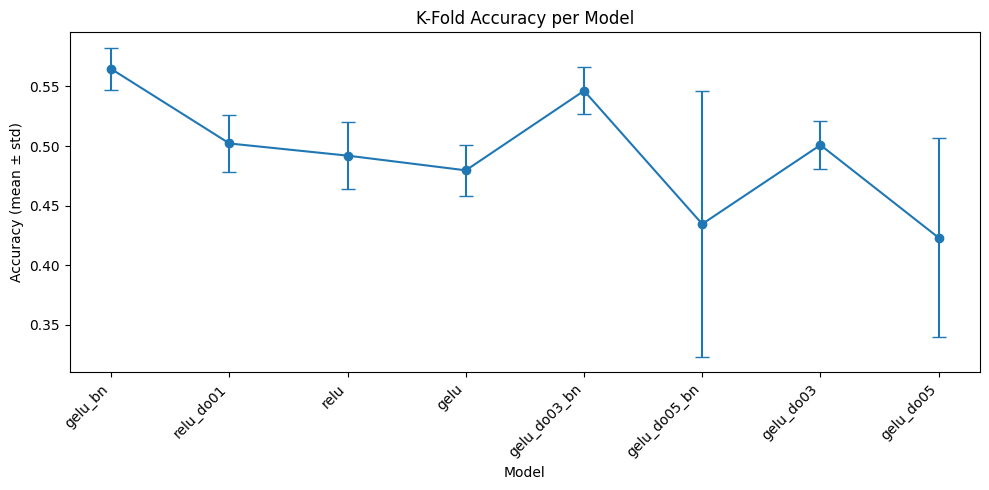

In [16]:
#플롯팅에서 GPT의 조언을 다수 차용하였습니다. fmt, xticks+rotation등...

# 1) Accuracy
plt.figure(figsize=(10, 5))
plt.errorbar(
    x, df["acc_mean"], yerr=df["acc_std"],
    fmt='o-', capsize=5
)
plt.xticks(x, names, rotation=45, ha="right")
plt.xlabel("Model")
plt.ylabel("Accuracy (mean ± std)")
plt.title("K-Fold Accuracy per Model")
plt.tight_layout()
plt.show()

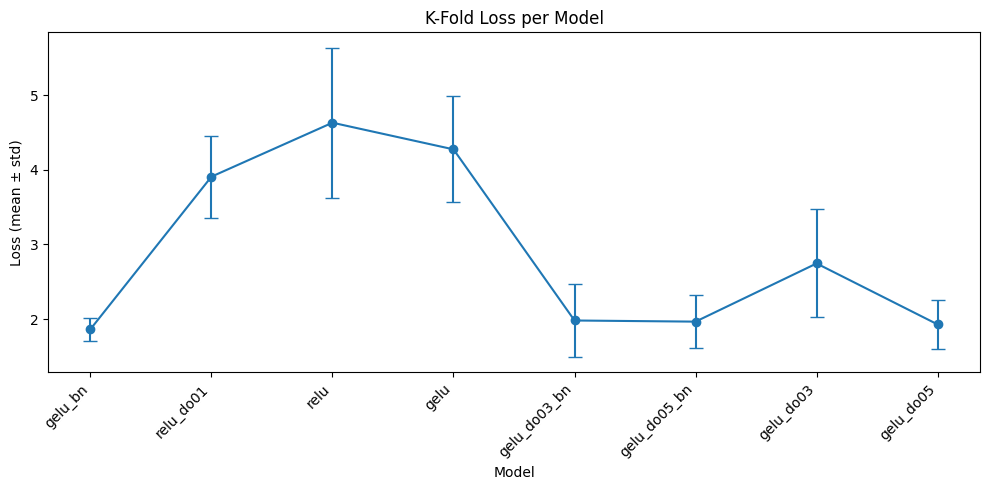

In [17]:
# 2) Loss plot
plt.figure(figsize=(10, 5))
plt.errorbar(
    x, df["loss_mean"], yerr=df["loss_std"],
    fmt='o-', capsize=5
)
plt.xticks(x, names, rotation=45, ha="right")
plt.xlabel("Model")
plt.ylabel("Loss (mean ± std)")
plt.title("K-Fold Loss per Model")
plt.tight_layout()
plt.show()

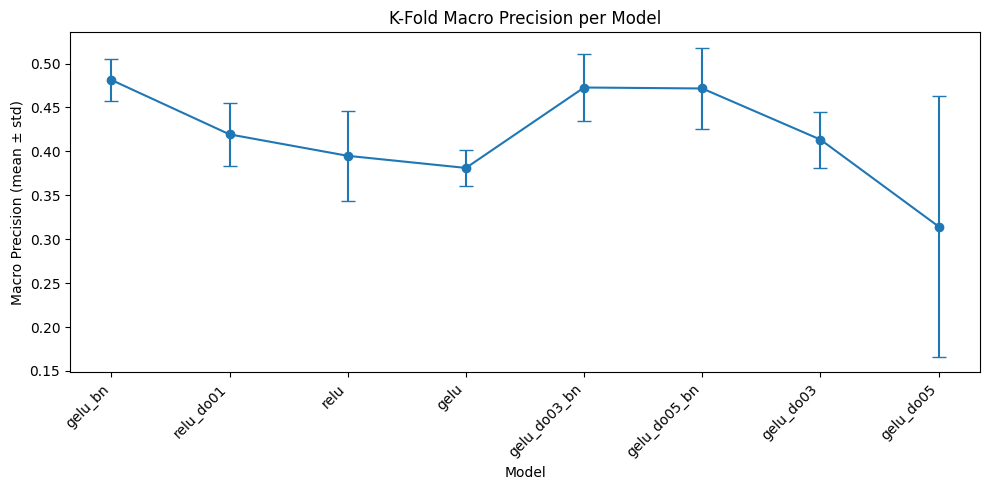

In [18]:
# 3) Macro Precision plot 
plt.figure(figsize=(10, 5))
plt.errorbar(
    x, df["prec_macro_mean"], yerr=df["prec_macro_std"],
    fmt='o-', capsize=5
)
plt.xticks(x, names, rotation=45, ha="right")
plt.xlabel("Model")
plt.ylabel("Macro Precision (mean ± std)")
plt.title("K-Fold Macro Precision per Model")
plt.tight_layout()
plt.show()

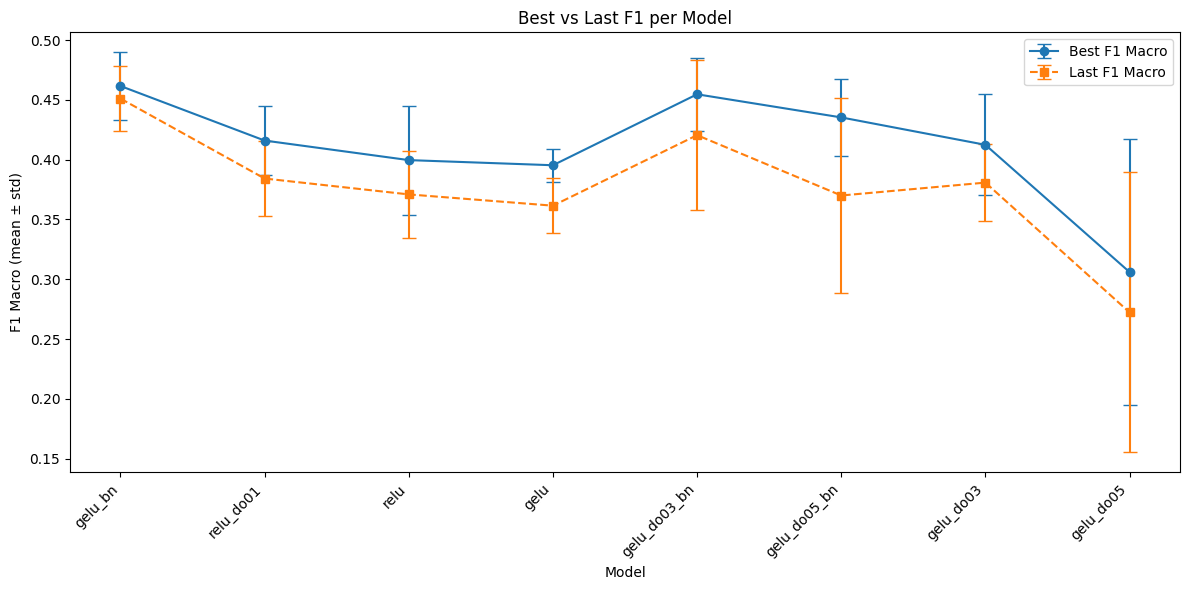

In [19]:
# 4) Best F1 vs Last F1 plot 
plt.figure(figsize=(12, 6))
plt.errorbar(
    x, df["best_f1_macro_mean"], yerr=df["best_f1_macro_std"],
    fmt='o-', capsize=5, label="Best F1 Macro"
)
plt.errorbar(
    x, df["last_f1_macro_mean"], yerr=df["last_f1_macro_std"],
    fmt='s--', capsize=5, label="Last F1 Macro"
)
plt.xticks(x, names, rotation=45, ha="right")
plt.xlabel("Model")
plt.ylabel("F1 Macro (mean ± std)")
plt.title("Best vs Last F1 per Model")
plt.legend()
plt.tight_layout()
plt.show()